In [1]:
import geopandas as gpd
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
gdf = gpd.read_file("https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson")
gdf.head()

,code,nom,geometry
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ..."
1,02,Aisne,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ..."
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.04907 46.75808, ..."
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.69209 44.18648, ..."
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.29922 45.10855, ..."


In [3]:
country = "France"
year = 2022
location_level = "department"

In [4]:
df = pd.read_csv(f"data_output/{country}/{year}_divisiveness_{location_level}.csv.gzip", compression="gzip")
df.head()

,alternative,value,rank,department
0,Marine LE PEN,0.100631,1,Ain
1,Éric ZEMMOUR,0.061813,2,Ain
2,Yannick JADOT,0.046450,3,Ain
3,Emmanuel MACRON,0.043608,4,Ain
4,Philippe POUTOU,0.041374,5,Ain


In [5]:
data = pd.merge(gdf, df, left_on="nom", right_on="department")
data.head()

,code,nom,geometry,alternative,value,rank,department
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",Marine LE PEN,0.100631,1,Ain
1,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",Éric ZEMMOUR,0.061813,2,Ain
2,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",Yannick JADOT,0.046450,3,Ain
3,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",Emmanuel MACRON,0.043608,4,Ain
4,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",Philippe POUTOU,0.041374,5,Ain


<AxesSubplot:>

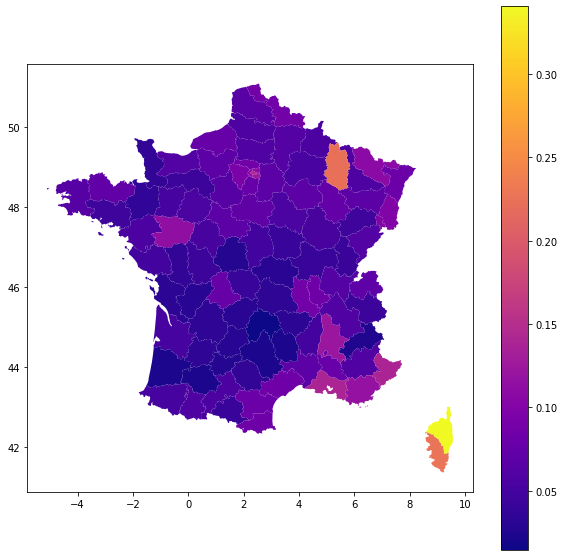

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))

data_tmp = data[data["alternative"] == "Éric ZEMMOUR"]
data_tmp.plot(column="value", cmap="plasma", ax=ax, legend=True)